In [ ]:
# !pip install transformers datasets torch faiss-cpu wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tokenizers-0.22.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.6.2-cp38-abi3-win_amd64.whl.metadata (4.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ------------- -------------------------- 3.9/11.6 MB 29.4 MB/s eta 0:00:01
   -------------- ------------------------- 4.2/11.6 MB 12.6 MB/s eta 0:00:01
   -------------- ------------------------- 4.2/11.6 MB 12.6 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.6 MB 6.2 MB/s eta 0:00:02
   ------------------- -------------------- 5.8/11.6 MB 5.7 MB/s eta 0:00:02
   --------------------- ------------------ 6.3/11.6 MB 5.0 MB/s eta 0:00:02
   ----------------------- ---------------- 6.8/11.6 MB 4.7 MB/s eta 0:00:02
   ------------------------ --------------- 7.1/11.6 MB 4.3 MB/s eta 0:00

  DEPRECATION: Building 'wget' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'wget'. Discussion can be found at https://github.com/pypa/pip/issues/6334



   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------------------- ----- 13/15 [transformers]
   ---------------------

In [ ]:
# !pip install matplotlib scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.6 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 7.0 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 8.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 7.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 7.0 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 2.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.9 MB 3.0 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.9 MB 3.1 MB/s eta 0:00:03
   ----------- ------------------

In [4]:
import wget
from transformers import DPRContextEncoder, DPRContextEncoderTokenizer
import torch

import numpy as np
import random
from transformers import DPRQuestionEncoder, DPRQuestionEncoderTokenizer
from transformers import AutoTokenizer, AutoModelForCausalLM

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

def warn(*args, **kwargs):
    pass

# You can use this section to supress the warnings generated by the code
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')




d:\Python-ML-DS\Coursera Gen AI IBM\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
def tsne_plot(data):
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt
    import numpy as np

    # Apply t-SNE to reduce to 3D
    tsne = TSNE(n_components=3, random_state=42, perplexity=data.shape[0]-1)
    data_3d = tsne.fit_transform(data)
    
    # Plotting
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Assign colors for each point based on its index
    num_points = len(data_3d)
    colors = plt.cm.tab20(np.linspace(0, 1, num_points))
    
    # Plot scatter with unique colors for each point
    for idx, point in enumerate(data_3d):
        ax.scatter(point[0], point[1], point[2], label=str(idx), color=colors[idx])
    
    # Adding axis labels
    ax.set_xlabel('TSNE Component 1')
    ax.set_ylabel('TSNE Component 2')
    ax.set_zlabel('TSNE Component 3')
    
    # Move title to the right side
    ax.set_title('3D t-SNE Visualization', loc='right', pad=20)

    # Move legend outside the plot to the right
    plt.legend(title='Input Order', bbox_to_anchor=(1.2, 1), loc='upper left')
    
    plt.show()


In [6]:
filename = 'companyPolicies.txt'
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/6JDbUb_L3egv_eOkouY71A.txt'

wget.download(url, out=filename)
print("File Downloaded")

File Downloaded


### Reading and Preprocessing the data

In [7]:
def read_and_split_text(filename):
    with open(filename, 'r') as file:
        text = file.read()
    paragraphs= text.split('\n') # Splits the text by newline characters (\n).
    # print(paragraphs)
    paragraphs = [para.strip() for para in paragraphs if len(para.strip()) > 0] # removes leading and trailing spaces. Keeps only non-empty lines.
    # print(paragraphs)
    return paragraphs

paragraphs = read_and_split_text('companyPolicies.txt')
print(paragraphs[0:20])

['1.\tCode of Conduct', 'Our Code of Conduct outlines the fundamental principles and ethical standards that guide every member of our organization. We are committed to maintaining a workplace that is built on integrity, respect, and accountability.', 'Integrity: We hold ourselves to the highest ethical standards. This means acting honestly and transparently in all our interactions, whether with colleagues, clients, or the broader community. We respect and protect sensitive information, and we avoid conflicts of interest.', "Respect: We embrace diversity and value each individual's contributions. Discrimination, harassment, or any form of disrespectful behavior is unacceptable. We create an inclusive environment where differences are celebrated and everyone is treated with dignity and courtesy.", 'Accountability: We take responsibility for our actions and decisions. We follow all relevant laws and regulations, and we strive to continuously improve our practices. We report any potential 

In [8]:
for i in range(20):
    print(f"Sample : {i} -- paragraph : {paragraphs[i]} \n")

Sample : 0 -- paragraph : 1.	Code of Conduct 

Sample : 1 -- paragraph : Our Code of Conduct outlines the fundamental principles and ethical standards that guide every member of our organization. We are committed to maintaining a workplace that is built on integrity, respect, and accountability. 

Sample : 2 -- paragraph : Integrity: We hold ourselves to the highest ethical standards. This means acting honestly and transparently in all our interactions, whether with colleagues, clients, or the broader community. We respect and protect sensitive information, and we avoid conflicts of interest. 

Sample : 3 -- paragraph : Respect: We embrace diversity and value each individual's contributions. Discrimination, harassment, or any form of disrespectful behavior is unacceptable. We create an inclusive environment where differences are celebrated and everyone is treated with dignity and courtesy. 

Sample : 4 -- paragraph : Accountability: We take responsibility for our actions and decisions.

In [9]:
%%capture
context_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
context_tokenizer

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizer'.


In [10]:
text = [("How are you?", "I am fine."), ("What's up?", "Not much.")]
print(text)

[('How are you?', 'I am fine.'), ("What's up?", 'Not much.')]


In [11]:
tokens_info = context_tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=256)
print(tokens_info)

{'input_ids': tensor([[ 101, 2129, 2024, 2017, 1029,  102, 1045, 2572, 2986, 1012,  102],
        [ 101, 2054, 1005, 1055, 2039, 1029,  102, 2025, 2172, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [12]:
# Check tokens for each input id
for s in tokens_info['input_ids']:
    print(context_tokenizer.convert_ids_to_tokens(s))

['[CLS]', 'how', 'are', 'you', '?', '[SEP]', 'i', 'am', 'fine', '.', '[SEP]']
['[CLS]', 'what', "'", 's', 'up', '?', '[SEP]', 'not', 'much', '.', '[SEP]']


In [13]:
# Check tokens for each input id and also what segment the fall in which is denoted by token_type_id
tokens = context_tokenizer.convert_ids_to_tokens(tokens_info['input_ids'][0])
segments = tokens_info['token_type_ids'][0]
result = [(t, s) for t, s in zip(tokens, segments)]
print(result)

[('[CLS]', tensor(0)), ('how', tensor(0)), ('are', tensor(0)), ('you', tensor(0)), ('?', tensor(0)), ('[SEP]', tensor(0)), ('i', tensor(1)), ('am', tensor(1)), ('fine', tensor(1)), ('.', tensor(1)), ('[SEP]', tensor(1))]


In [14]:
context_encoder = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
random.seed(42)
random.shuffle(paragraphs)

Checking the encoding for first 20 lines in paragraph

In [16]:
tokens = context_tokenizer(paragraphs[:20], return_tensors='pt', padding=True, truncation=True, max_length=256)
print(tokens)
outputs = context_encoder(**tokens)
print(outputs.pooler_output)


{'input_ids': tensor([[  101,  3465,  2968,  ...,     0,     0,     0],
        [  101,  2057,  9120,  ...,     0,     0,     0],
        [  101,  1016,  1012,  ...,     0,     0,     0],
        ...,
        [  101,  8822,  1024,  ...,     0,     0,     0],
        [  101,  2115, 29235,  ...,     0,     0,     0],
        [  101,  1017,  1012,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}
tensor([[ 0.1740,  0.3478,  0.1819,  ..., -0.4684, -0.5166,  0.0325],
        [ 0.7075,  0.6072,  0.0172,  ..., -0.1247,  0.4195, -0.4397],
        [

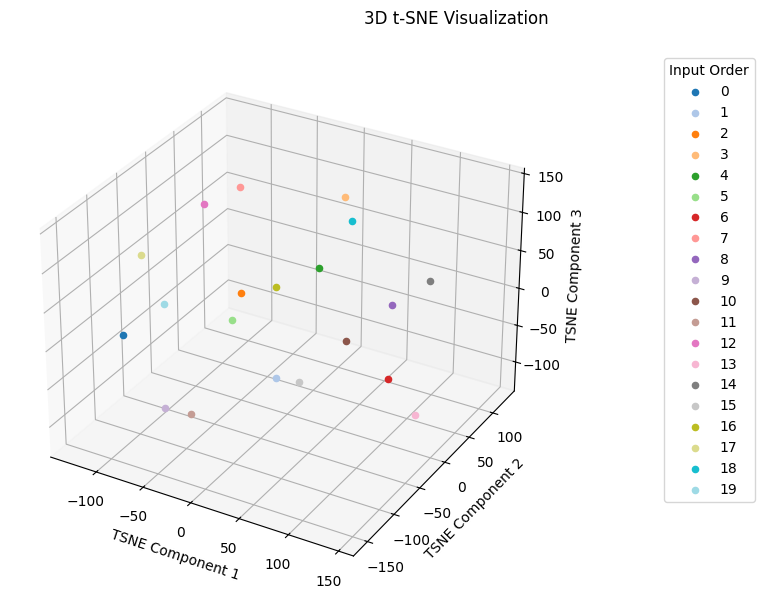

In [17]:
tsne_plot(outputs.pooler_output.detach().numpy())

In [18]:
print("sample 16 : ", paragraphs[16])

sample 16 :  7.	Health and Safety Policy


In [19]:
print("sample 12 : ", paragraphs[12])

sample 12 :  8.	Anti-discrimination and Harassment Policy


In [20]:
embeddings=[]
for text in paragraphs[0:5]:
    inputs = context_tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=256)
    outputs = context_encoder(**inputs)
    embeddings.append(outputs.pooler_output)
    print("number of samples : ", len(embeddings))
    print("sample shapes : ", outputs.pooler_output.shape)

number of samples :  1
sample shapes :  torch.Size([1, 768])
number of samples :  2
sample shapes :  torch.Size([1, 768])
number of samples :  3
sample shapes :  torch.Size([1, 768])
number of samples :  4
sample shapes :  torch.Size([1, 768])
number of samples :  5
sample shapes :  torch.Size([1, 768])


In [21]:
torch.cat(embeddings).detach().numpy().shape

(5, 768)

Now consolidate the above steps in one function

In [24]:
def encode_context(text_list):
    embeddings = []
    for text in text_list:
        inputs = context_tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=256)
        outputs = context_encoder(**inputs)
        # print(outputs)
        # print("==============================================")
        embeddings.append(outputs.pooler_output)
    return torch.cat(embeddings).detach().numpy() #returns a NumPy array where each row is a dense vector (an embedding) representing one paragraph. These embeddings are suitable for indexing with FAISS or similarity search.

context_embeddings = encode_context(paragraphs)
        

In [26]:
import faiss

embedding_dim = 768
context_embeddings_np = np.array(context_embeddings).astype('float32')

index = faiss.IndexFlatL2(embedding_dim)
index.add(context_embeddings_np)

In [27]:
question_encoder = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.bias', 'question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Xet Storage is enabled for this repo, but the 'hf_xet' pack

In [28]:
question = 'Drug and Alocohol Policy'
question_inputs = question_tokenizer(question, return_tensors='pt')
question_embedding = question_encoder(**question_inputs).pooler_output.detach().numpy()

D, I = index.search(question_embedding, k=5)
print("D : ", D)
print("I : ", I)

D :  [[83.48913  88.72375  89.966515 90.57648  92.463066]]
I :  [[ 6 64 42 33 17]]


In [29]:
print("Top 5 relevant contexts : ")
for i, idx in enumerate(I[0]):
    print(f"{i+1} : {paragraphs[idx]}")
    print(f"Distance : {D[0][i]}\n")

Top 5 relevant contexts : 
1 : Policy Objective: The Drug and Alcohol Policy is established to establish clear expectations and guidelines for the responsible use of drugs and alcohol within the organization. This policy aims to maintain a safe, healthy, and productive workplace.
Distance : 83.48912811279297

2 : 9.	Discipline and Termination Policy
Distance : 88.72374725341797

3 : 6.	Drug and Alcohol Policy
Distance : 89.96651458740234

4 : Testing and Searches: The organization reserves the right to conduct drug and alcohol testing as per applicable laws and regulations. Employees may be subject to testing in cases of reasonable suspicion, post-accident, or as part of routine workplace safety measures.
Distance : 90.57647705078125

5 : Monitoring: The company retains the right to monitor internet and email usage for security and compliance purposes.
Distance : 92.46306610107422



Consolidate the above function

In [30]:
def search_relevant_contexts(question, question_tokenizer, question_encoder, index, k=5):
    question_inputs = question_tokenizer(question, return_tensors='pt')
    question_embedding = question_encoder(**question_inputs).pooler_output.detach().numpy()
    D, I = index.search(question_embedding, k)
    return D, I

In [33]:
tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")
model.generation_config.pad_token_id = tokenizer.pad_token_id

In [34]:
contexts = "What is large language model?"

In [35]:
inputs = tokenizer(contexts, return_tensors='pt', truncation=True, max_length=1024)
print(inputs)

{'input_ids': tensor([[2061,  318, 1588, 3303, 2746,   30]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


In [36]:
summary_ids = model.generate(inputs['input_ids'], max_length=50, num_beams=4, early_stopping=True, pad_token_id=tokenizer.eos_token_id)
summary_ids

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


tensor([[ 2061,   318,  1588,  3303,  2746,    30,   198,   198,    32,  1588,
          3303,  2746,   318,   257,   900,   286,  3173,   326,  6901,   703,
           257,  3303,   815, 17438,   287,   257,  1813,  4732,    13,  1114,
          1672,    11,   611,   345,   765,   284,  3551,   257,  2163,   326,
          5860,   257,  1351,   286, 13042,    11,   345,   460,  3551,   340]])

In [37]:
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(summary)

What is large language model?

A large language model is a set of rules that describe how a language should behave in a given context. For example, if you want to write a function that returns a list of strings, you can write it


Comparing Answers generation: with and without DPR Contexts

In [41]:
# This is how GPT2 model generates answers without any additional contexts
def generate_answers_without_context(question):
    inputs = tokenizer(question, return_tensors='pt', truncation=True, max_length=1024)
    summary_ids = model.generate(inputs['input_ids'], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True, pad_token_id=tokenizer.eos_token_id)
    answer = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return answer

In [42]:
question = "what is mobile policy?"
answer = generate_answers_without_context(question)
print("Answer : ", answer)

Answer :  what is mobile policy?

Mobile policy is a set of rules and regulations that govern the use of mobile phones and other electronic devices in the United States. Mobile policy is a set of rules and regulations that govern the use of mobile phones and other electronic devices in the United States. Mobile policy is a set of rules and regulations that govern the use of mobile phones and other electronic devices in the United States. Mobile policy is a set of rules and regulations that govern the use of mobile phones and other electronic devices in the United States. Mobile policy is a set of rules and regulations that govern the use of mobile phones and other electronic devices in the United States. Mobile policy is a set of rules and regulations that govern the use of mobile phones and other


In [43]:
# This is how GPT2 model generates answers with any additional contexts
def generate_answer(question, contexts):
    input_text = question + " " + " ".join(contexts)
    inputs = tokenizer(input_text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_new_tokens=50, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True, pad_token_id=tokenizer.eos_token_id)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [48]:
question = "What is mobile policy?"
_, I = search_relevant_contexts(question, question_tokenizer, question_encoder, index, k=5)
print(f"Paragraph indexes {I}")

Paragraph indexes [[71 10 17  3 49]]


In [49]:
top_contexts = [paragraphs[idx] for idx in I[0]]
print(f"top_contexts {top_contexts}")

top_contexts ['4.\tMobile Phone Policy', 'The Mobile Phone Policy sets forth the standards and expectations governing the appropriate and responsible usage of mobile devices in the organization. The purpose of this policy is to ensure that employees utilize mobile phones in a manner consistent with company values and legal compliance.', 'Monitoring: The company retains the right to monitor internet and email usage for security and compliance purposes.', 'Acceptable Use: Mobile devices are primarily intended for work-related tasks. Limited personal usage is allowed, provided it does not disrupt work obligations.', 'The Mobile Phone Policy is aimed at promoting the responsible and secure use of mobile devices in line with legal and ethical standards. Every employee is expected to comprehend and abide by these guidelines. Regular reviews of the policy ensure its ongoing alignment with evolving technology and security best practices.']


In [50]:
answer = generate_answer(question, top_contexts)
print("Generated answer : ", answer)

Generated answer :  What is mobile policy? 4.	Mobile Phone Policy The Mobile Phone Policy sets forth the standards and expectations governing the appropriate and responsible usage of mobile devices in the organization. The purpose of this policy is to ensure that employees utilize mobile phones in a manner consistent with company values and legal compliance. Monitoring: The company retains the right to monitor internet and email usage for security and compliance purposes. Acceptable Use: Mobile devices are primarily intended for work-related tasks. Limited personal usage is allowed, provided it does not disrupt work obligations. The Mobile Phone Policy is aimed at promoting the responsible and secure use of mobile devices in line with legal and ethical standards. Every employee is expected to comprehend and abide by these guidelines. Regular reviews of the policy ensure its ongoing alignment with evolving technology and security best practices.

The Mobile Phone Policy sets forth the s

### What each generation parameter changes (intuitively)

max_new_tokens (here max_len): absolute cap on new tokens generated. Higher → can produce longer answers/details.

min_length (here min_len): forces at least this many tokens to be produced (older HF versions treat this as total length; newer ones have min_new_tokens to be unambiguous). If min_length > max_new_tokens the behavior can be confusing—use min_new_tokens together with max_new_tokens to be explicit.

length_penalty: >1 penalizes long sequences (tends to make output more concise). <1 encourages longer generations.

num_beams: beam search width. 1 = greedy; >1 = beam search that explores multiple hypotheses. Higher values → better and more coherent outputs but slower.


### How to compare the generated answers (analysis guidelines)
### When you compare outputs, look for:

Conciseness: is the answer short and to the point?

Relevance / grounding: does it use the retrieved policy facts (e.g., PIN, MDM, report 24 hours) or hallucinate?

Completeness: are key points included?

Repetition: does it repeat phrases unnecessarily?

Fluency / coherence: grammar and readability.

Factual alignment: how well the answer matches the retrieved contexts.

Quantitative checks:

Time to generate (latency) per setting (beams increase time).

Token counts of outputs.

Human scoring or simple heuristics (n-gram overlap with contexts, or whether key phrases present).

In [58]:
def generate_answer(question, contexts, max_len=50, min_len=40, length_penalty=2.0, num_beams=4):
    input_text = question + " " + " ".join(contexts)
    inputs = tokenizer(input_text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(
        inputs['input_ids'],
        max_new_tokens=max_len,
        min_length=min_len,
        length_penalty=length_penalty,
        num_beams=num_beams,
        early_stopping=True
    )
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [59]:
question = "what is mobile policy?"

In [60]:
_, I = search_relevant_contexts(question, question_tokenizer, question_encoder, index, k=5)
top_contexts = [paragraphs[idx] for idx in I[0]]

In [61]:
settings = [
    (50, 50, 1.0, 2),
    (120, 30, 2.0, 4),
    (100, 20, 2.5, 6),
    (100, 60, 0.8, 4)
]

In [1]:
for setting in settings:
    answer = generate_answer(question, top_contexts, *setting)
    print(f"Setting : max_new_tokens={setting[0]}, min_length={setting[1]}, length_penalty={setting[2]}, num_beams={setting[3]}")
    print("Generated Answer : ", answer)
    print("\n" + "="*80 + "\n")

NameError: name 'settings' is not defined